In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)


In [2]:
(x_Train,y_Train),(x_Test,y_Test) =  mnist.load_data()

In [3]:
#CNN因為必須先進行卷積與池化運算，所以必須保持影像的維度，所以reshape 轉換為60000筆，每一筆有28×28×1的影像，
#分别是28（寬）×28（高）×1（單色）

#將features(影像特徵)以reshape轉換為6000*28*28*1的4維矩陣
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
#將features標準化,可以提高模型預測準確度,並更快收斂。
x_Train4D_normalize = x_Train4D/255
x_Test4D_normalize = x_Test4D/255

In [5]:
#使用np_utils.to_categorical，將訓練資料與測試資料的label，進行Onehot encoding轉換
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()

In [8]:
#建立卷積層1。輸入數字大小事28*28大小，執行第1次卷積運算會產生16個影像，大小不會改變。
model.add(Conv2D(filters=6,            #建立16個濾鏡filter weight
                 kernel_size=(5,5),    #每個綠徑5*5大小
                 padding='same',       #設定讓卷積運算，產生的卷積大小不變
                 activation='relu',    #設定ReLU激活函數
                 input_shape=(28,28,1) #第1、2維度:表輸入的影像形狀28*28大小，第3維度:因為是單色灰階所以維度是1
                ))  

In [9]:
#建立池化層1 執行第1次縮減取樣 將16個28*28縮小為16個14*14的影像
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
#建立卷積層2
model.add(Conv2D(filters=36,            #建立16個濾鏡filter weight
                 kernel_size=(5,5),    #每個綠徑5*5大小
                 padding='same',       #設定讓卷積運算，產生的卷積大小不變
                 activation='relu',    #設定ReLU激活函數
                ))  

In [11]:
#建立池化層2並加入Dropout避免overfitting
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Dropout(0.25)) #每次訓練迭代時，會隨機在神經網路中放棄25%的神經元，以避免overfitting。

將之前的步驟已經建立好池化層2，共有36個7*7*影像，轉換為1維的向量，長度是36*7*7=1764個float數字，正好對到1764神經元。

In [13]:
#建立平坦層
model.add(Flatten())

In [14]:
#建立隱藏層
model.add(Dense(128,activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
#建立輸出層，使用softmax激活函數進行轉換。softmax可以將神經元的輸出，轉換為預測每一個數字的機率。
model.add(Dense(10,activation='softmax'))

In [17]:
#查看模型摘要
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        5436      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [22]:
#定義訓練方式
model.compile(loss='categorical_crossentropy', #設定損失函數
              optimizer='adam',                #設定訓練最優化方法
              metrics=['accuracy'])            #評估模型的方式是accuracy準確率

In [23]:
#開始訓練
train_history = model.fit(
    x=x_Train4D_normalize,
    y=y_TrainOneHot,
    validation_split=0.2,
    epochs=10,
    batch_size=300,
    verbose=2)

Epoch 1/10
160/160 - 12s - loss: 0.5667 - accuracy: 0.8206 - val_loss: 0.1208 - val_accuracy: 0.9629 - 12s/epoch - 72ms/step
Epoch 2/10
160/160 - 10s - loss: 0.1618 - accuracy: 0.9516 - val_loss: 0.0760 - val_accuracy: 0.9770 - 10s/epoch - 65ms/step
Epoch 3/10
160/160 - 10s - loss: 0.1122 - accuracy: 0.9665 - val_loss: 0.0649 - val_accuracy: 0.9803 - 10s/epoch - 65ms/step
Epoch 4/10
160/160 - 10s - loss: 0.0925 - accuracy: 0.9720 - val_loss: 0.0508 - val_accuracy: 0.9840 - 10s/epoch - 64ms/step
Epoch 5/10
160/160 - 10s - loss: 0.0781 - accuracy: 0.9764 - val_loss: 0.0458 - val_accuracy: 0.9869 - 10s/epoch - 64ms/step
Epoch 6/10
160/160 - 10s - loss: 0.0683 - accuracy: 0.9799 - val_loss: 0.0435 - val_accuracy: 0.9875 - 10s/epoch - 65ms/step
Epoch 7/10
160/160 - 10s - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0423 - val_accuracy: 0.9887 - 10s/epoch - 65ms/step
Epoch 8/10
160/160 - 10s - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.0407 - val_accuracy: 0.9891 - 10s/epoch - 65ms/step


In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

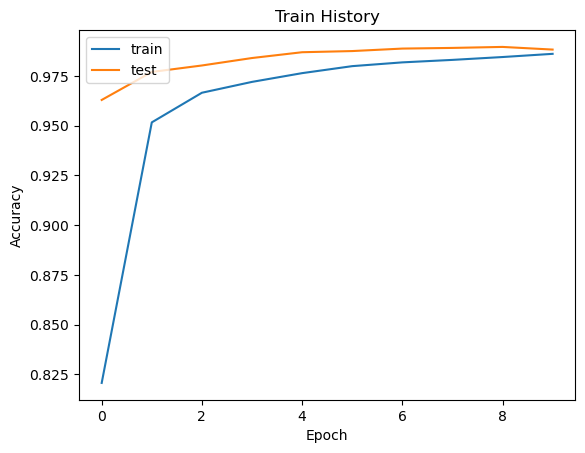

In [26]:
#畫出accuracy執行結果
show_train_history('accuracy','val_accuracy')

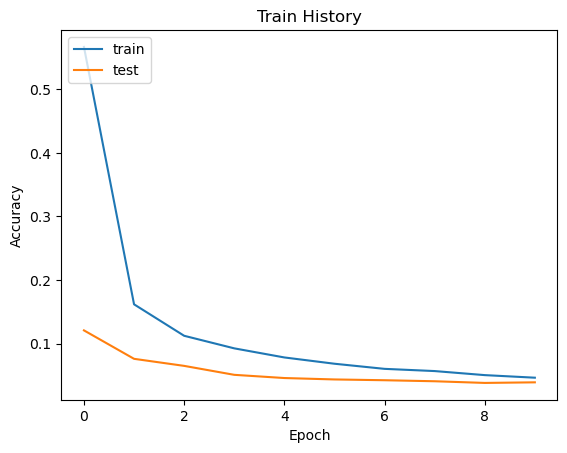

In [27]:
show_train_history('loss','val_loss')

透過以上圖片得知，不論訓練或驗證，準確率越來越高。而且驗證的誤差越來越低。

In [28]:
#評估模型準確率
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.0283 - accuracy: 0.9910


0.9909999966621399

In [30]:
#進行預測
prediction=model.predict(x_Test4D_normalize)
classes_x=np.argmax(prediction,axis=1)

313/313 [==============================] - 1s 4ms/step


In [31]:
classes_x

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [32]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

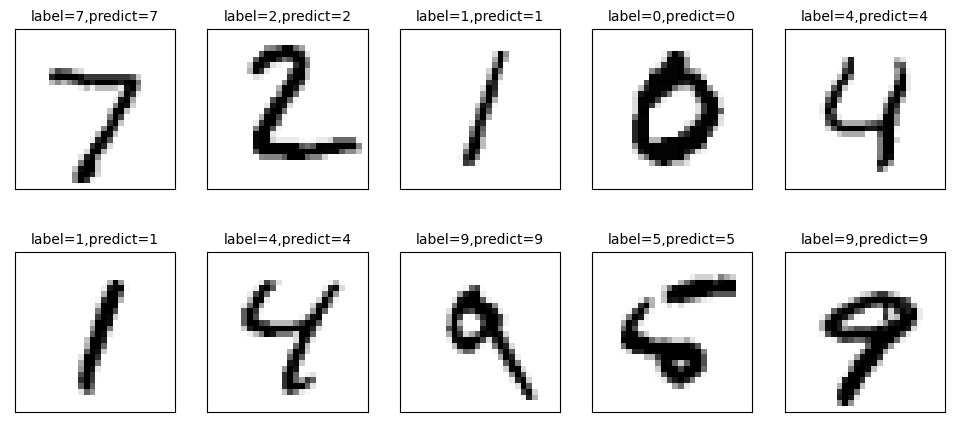

In [33]:
#顯示前10筆資料
plot_images_labels_prediction(x_Test,y_Test,classes_x,idx=0)

In [34]:
#建立混淆矩陣
import pandas as pd
pd.crosstab(y_Test,              #輸入真實值
            classes_x,           #預測結果
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,2,1,1,0
1,0,1133,1,0,0,0,1,0,0,0
2,0,2,1024,0,0,0,0,5,1,0
3,0,0,1,1001,0,3,0,3,2,0
4,0,1,0,0,979,0,0,0,0,2
5,2,1,0,3,0,884,1,0,0,1
6,4,1,0,0,2,2,948,0,1,0
7,0,2,2,1,0,0,0,1022,1,0
8,2,1,3,2,1,1,0,3,957,4
